# Quantum Random Walk

In [1]:
from numpy import *
from matplotlib.pyplot import *

In [2]:
N = 100      # number of random steps
P = 2*N+1    # number of positions

## Quantum Coin

Quantum coin has basis states 0 and 1. We toss a quantum coin to decide whether to go left or right (or a superposition). 

In [3]:
coin0 = array([1, 0])  # |0>
coin1 = array([0, 1])  # |1>

## Hademard coin operator

The coin operator, that can be used to flip a quantum coin into a superposition, is:

In [4]:
C00 = outer(coin0, coin0)  # |0><0| 
C01 = outer(coin0, coin1)  # |0><1| 
C10 = outer(coin1, coin0)  # |1><0| 
C11 = outer(coin1, coin1)  # |1><1|

C_hat = (C00 + C01 + C10 - C11)/sqrt(2.)

## Shift (step) operator

The step operator moves left or right along the line, depending on the value of the coin:

In [5]:
ShiftPlus = roll(eye(P), 1, axis=0)
ShiftMinus = roll(eye(P), -1, axis=0)
S_hat = kron(ShiftPlus, C00) + kron(ShiftMinus, C11)

## Walk operator

The walk operator combines the coin operator on the coin state, and a step operator on the combined coin and position state:

In [6]:
U = S_hat.dot(kron(eye(P), C_hat))

## Initial State
Let’s take the initial state of the system to be a coin in a superposition of left and right, and the walker at position 0:

#### Please change the initial state of the system of the coin here.

In [7]:
posn0 = zeros(P)
posn0[N] = 1     # array indexing starts from 0, so index N is the central posn
psi0 = kron(posn0,(coin0+coin1*1j)/sqrt(2.))

## state after N steps
Then walking N steps is just applying the walk operator N times:

In [8]:
psiN = linalg.matrix_power(U, N).dot(psi0)

## Measurement operator

In [9]:
prob = empty(P)
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = proj.dot(proj.conjugate()).real

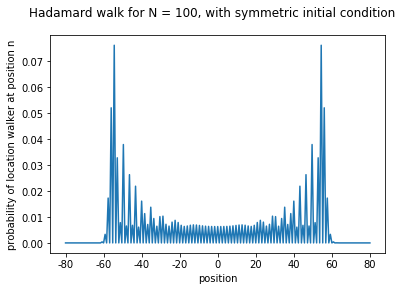

In [23]:
fig = figure()
ax = fig.add_subplot(111)
#fig.xlabel('position')
plot(arange(P), prob)
ax.set_xticklabels(range (-N, N+1, P // 10))
xlabel('position')
ylabel('probability of location walker at position n')
suptitle('Hadamard walk for N = 100, with symmetric initial condition')
show()


Probability distribution for a quantum random walk with N=100, symmetric initial coin

## Changing the initial state 

We start with initial coin state /0>


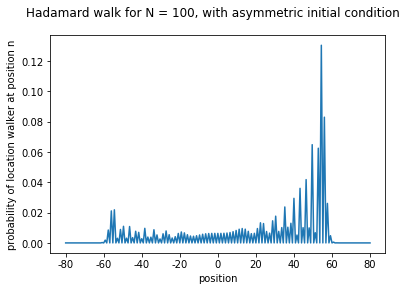

In [24]:
newPosn0 = zeros(P)
newPosn0[N] = 1     # array indexing starts from 0, so index N is the central posn
newPsi0 = kron(posn0,coin0)

newPsiN = linalg.matrix_power(U, N).dot(newPsi0)
newProb = empty(P)
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(newPsiN)
    newProb[k] = proj.dot(proj.conjugate()).real

newfig = figure()
ax = newfig.add_subplot(111)
ax.set_xticklabels(range (-N, N+1, P // 10))
plot(arange(P), newProb)
xlabel('position')
ylabel('probability of location walker at position n')
suptitle('Hadamard walk for N = 100, with asymmetric initial condition')
show()